In [ ]:
import matplotlib.pyplot as plt
import wordcloud
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
import plotly
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("dataset_1L.csv")
df.head()

,ID,Title,Post,Flair,Upvote,Downvote,comments,Media,Month,Year
0,g1tpq5,"Watch | ""Have to fill our stomach"": Migrant wo...",NaN,Coronavirus,26,0,2,4,4,2020
1,g1tm26,Need carrier advice.,I'm a second year CS student. What should I le...,AskIndia,6,0,3,0,4,2020
2,g1tfmd,Airlines Cancellation Policy?,Hi Guys \t\tSince the lockdown has extended an...,AskIndia,7,0,7,0,4,2020
3,g1tbx6,The secret to getting votes* ft. BJP,[deleted],Politics,1,0,0,0,4,2020
4,g1taa4,‘Bhilwara model’ loses its way in Jaipur’s con...,NaN,Coronavirus,23,0,1,0,4,2020


In [ ]:
month = {1:"Jan",
         2:"Feb",
         3:"Mar",
         4:"Apr",
         5:"May",
         6:"Jun",
         7:"Jul",
         8:"Aug",
         9:"Sep",
        10:"Oct",
        11:"Nov",
        12:"Dec"}
func=lambda x,y: month[x]+','+str(y)

yy=list(map(func,df['Month'],df['Year']))
df['Time']=yy

In [ ]:
time = np.array([ 'Sep,2019','Oct,2019','Nov,2019','Dec,2019','Jan,2020','Feb,2020','Mar,2020','Apr,2020'])
flair = np.unique(df["Flair"])
time_flair_count=pd.DataFrame(([[df[(df["Flair"] == i) & (df["Time"] == j)].shape[0] for i in flair] for j in time]),index = time,columns= flair)
time_flair_count

,AskIndia,CAA-NRC,Coronavirus,Food,Non-Political,Photography,Policy/Economy,Politics,Scheduled,Science/Technology,Sports
"Sep,2019",554,0,0,30,747,113,182,699,30,130,50
"Oct,2019",1586,0,0,93,2240,282,617,1851,71,373,120
"Nov,2019",1551,0,0,109,2151,226,547,1821,91,394,136
"Dec,2019",1558,2,0,91,2013,177,614,5948,121,334,120
"Jan,2020",1403,258,0,109,1892,153,492,4564,138,342,147
"Feb,2020",1401,596,1,98,2053,164,476,3097,103,369,143
"Mar,2020",1633,201,3781,121,2495,211,455,1813,118,371,95
"Apr,2020",913,0,2691,78,1157,157,180,759,56,213,63


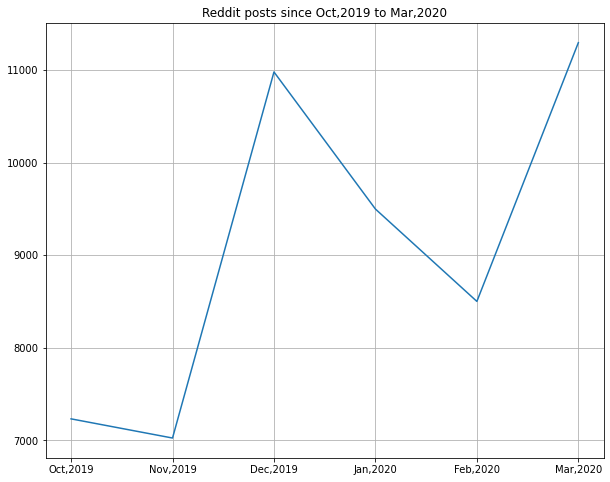

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x= time[1:-1], y=np.sum(time_flair_count.iloc[1:-1],axis = 1))
plt.title("Reddit posts since Oct,2019 to Mar,2020")
plt.grid()
plt.show()


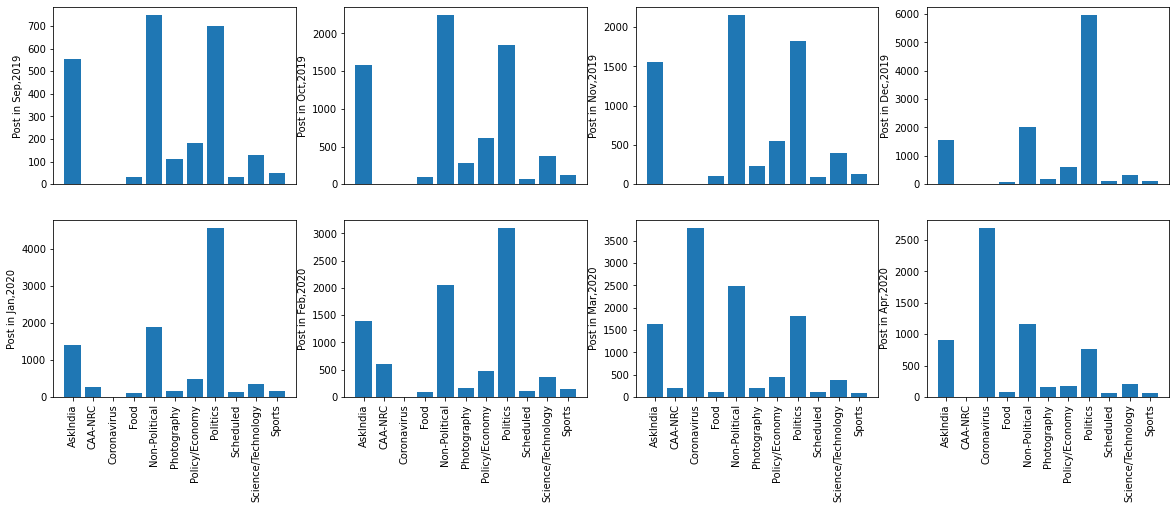

In [ ]:
x = range(10)
fig = plt.figure(figsize = (20,15))
for i in range(len(time)):
  plt.subplot(4,4,i+1)
  pop=plt.bar(flair,time_flair_count.iloc[i,:].values)
  plt.xticks()
  plt.ylabel('Post in {}'.format(time[i]))
  if i in [4,5,6,7]:
        plt.xticks(flair,  rotation='vertical')
  else:
        plt.xticks([],[] )

plt.show()


In [ ]:
import plotly.graph_objects as go
data = [go.Bar(name = flair[i], x = time[1:],y = np.sum(time_flair_count.iloc[1:,:], axis = 1) ) for i in range(1,len(flair)) ]

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show("colab")

In [ ]:
from nltk.corpus import stopwords
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
stopw=stopwords.words('english')+["[deleted]"] + ["[removed]"]
word_count = lambda x: [word for word in word_tokenize(x) if not word in stopwords.words()]
length = []
for d in tqdm(range(df.shape[0])):
    
    t  = df.iloc[d, 1]  if type(df.iloc[d,2]) == float else df.iloc[d,1]+ " " + df.iloc[d,2] 
    t = t.lower()
    word_list = word_count(t)
    length.append(len(word_count(t)))
    string = ' '.join(word[0] for word in word_list)
    with open("reddit.txt","a", encoding = 'utf-8') as txt:
        txt.write(t + "\n")

In [ ]:
flair         = np.array(df[["Flair","Upvote","comments","Media"]])
name,Count    = np.unique(flair[:,0].astype(str),return_counts= True)
length_       = np.array(length).reshape(-1, 1).astype(int)
award_upvote  = lambda x : flair[:,1][flair[:,0] == x].sum()
award_comment = lambda x : flair[:,2][flair[:,0] == x].sum()
award_media   = lambda x : flair[:,3][flair[:,0] == x].sum()
# lengt_h       = lambda x : length_[flair[:,0]    == x].sum()

upvote  = np.array(list(map(award_upvote, name))).astype(int)
comment = np.array(list(map(award_comment, name))).astype(int)
media   = np.array(list(map(award_media, name))).astype(int)
# length_ = np.array(list(map(lengt_h, name))).astype(int)
dtype   = {"Count":np.int16,"Upvote":np.int32,"Comments":np.int32,"Media":np.int16}#"Length":np.int64} 
df_flair = pd.DataFrame(np.dstack((Count,upvote,comment,media))[0],dtype= int,index = name, columns=list(dtype.keys()))

df_flair

,Count,Upvote,Comments,Media
AskIndia,10599,151723,102234,1536
CAA-NRC,1057,100588,15292,672
Coronavirus,6473,455012,85253,3364
Food,729,28577,5574,660
Non-Political,14748,868103,153747,8056
Photography,1483,71961,4870,1204
Policy/Economy,3563,167121,27820,1152
Politics,20552,2072174,263698,10524
Scheduled,728,14188,444609,132
Science/Technology,2526,34079,7372,1980


In [ ]:
import plotly.express as px
dft=df_flair.iloc[:25]
fig=px.bar(dft,y=name,x='Count',
           hover_data=['Upvote', 'Comments', "Media"],
           title="Number of Posts in every Flair",
           color=name,
           text='Count'
           ,labels={'Flair':name}, height=600, orientation = "h")

fig.update_layout( yaxis={'categoryorder':'max ascending'})
fig.show('colab')

In [ ]:
import wordcloud
import cv2
fonts=r'segoeprb.ttf'
stop = wordcloud.STOPWORDS.add("deleted'")
stop = wordcloud.STOPWORDS.add("removed'")
stop = wordcloud.STOPWORDS.add("remove")
stop = wordcloud.STOPWORDS.add("delete")

with open('reddit.txt','r',encoding='utf-8') as f:
  file_content=f.read()
  

In [1]:
!pip install s3fs

     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 6.5MB 14.9MB/s 
     |████████████████████████████████| 1.3MB 56.3MB/s 
     |████████████████████████████████| 552kB 47.5MB/s 
     |████████████████████████████████| 143kB 58.9MB/s 
     |████████████████████████████████| 296kB 61.2MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=8754e70a633a40d2cafd17e6f80bcb12060df1b6b3bd37e67894ed4a2505c4b1
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [ ]:
from google.colab import files
files.upload()

Saving reddit.png to reddit.png


{'reddit.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\t`\x00\x00\r\'\x08\x04\x00\x00\x00@V\xda"\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x02bKGD\x00\xff\x87\x8f\xcc\xbf\x00\x00\x00\tpHYs\x00\x00\x13\xe2\x00\x00\x13\xe2\x01\x95\xf7\xa69\x00\x00\x00\x07tIME\x07\xe2\x02\x07\x154\x1e+\x87\xd4\xff\x00\x00\x80\x00IDATx\xda\xec\xddw\xb8ee}6\xe0g`\xe8]:\xa2 6\x8a\x88\n(0\x83\x15\x15\x94\xaab\xd4\xa81\xf9"\xc6\xf2\x89\x89FMb>K\x9a\xc6\xc4\x16\x8d\x8a&\xf6\x8a(]Q\xb01cA\xa9JS\x1c@\x94*\xd2\xcb0\xc3\xcc\xf7\x07\x03\x0c0\xe5\x94\xb5\xf7o\x95\xfb>\xd7\x95 \xcc\x9c\xf3\xec\xbd\xdf\xb5\xf6z\x9f\xb3\xdew\xcf\x08\x00\x00T\xdb2\xff\x9d\x83\x0b\x7f\xfe\xc2\x9c\x9d\xb9\x99\x93\xef\xe7\x9a\xea\xa7\x02\x98\x96M\xf2\xc9\x1cT\x1d\x82V\xbb*\x7f\x9eoV\x87`\xf2fT\x07\x00\x00`\xf0^\x9c\x8fe\xfd\xea\x10I\x92\xc5\xb9 s2\'s2\xaf:\n0\x05\xfb\xe43\xd9\xaa:\x04

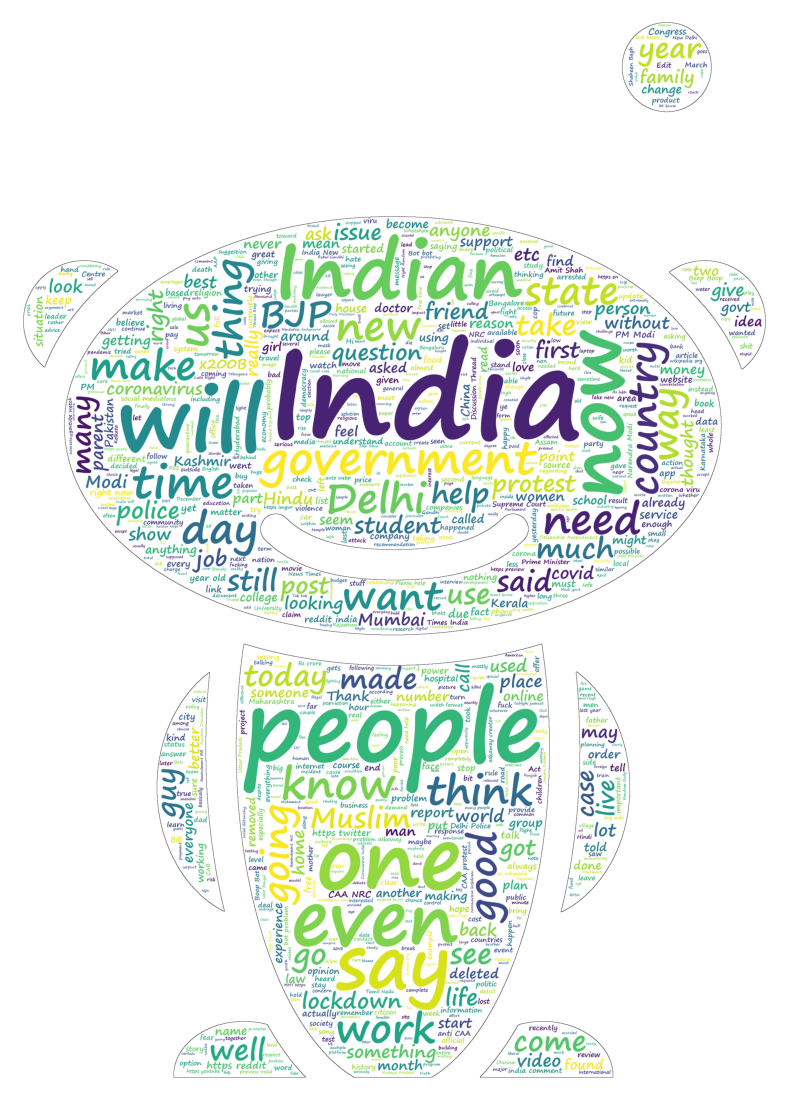

In [ ]:
Wordcloud=wordcloud.WordCloud( 
    mask=(255-(cv2.imread('reddit.png')[:,:,0])),
    stopwords=stop,
    background_color='white',
    font_path=fonts,
     width = 1200,
     height = 1000,max_words=1000, contour_width=1,
).generate(file_content)
plt.figure(figsize = (20,20))
plt.imshow(Wordcloud)
plt.axis('off')
plt.savefig('./reddit-gilded-comments-wordcloud.png', bbox_inches='tight');
plt.show()
